In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
path='C:/Users/Administrator/Desktop/lstm/sunspots/sunspot_data.csv'

df = pd.read_csv(path, sep=';', names=['year','month','1','Sunspot','3','4','5'])

df['Date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')
df=df.drop(columns=['year','month','1','3','4','5'])
df

,Sunspot,Date
0,96.7,1749-01-01
1,104.3,1749-02-01
2,116.7,1749-03-01
3,92.8,1749-04-01
4,141.7,1749-05-01
...,...,...
3286,77.6,2022-11-01
3287,113.1,2022-12-01
3288,143.6,2023-01-01
3289,110.9,2023-02-01


In [3]:
def prepare_data(data, n_in=1, n_out=1):
    X, y = [], []
    for i in range(len(data)-n_in-n_out):
        X.append(data[i:i+n_in])
        y.append(data[i+n_in:i+n_in+n_out])
    return np.array(X), np.array(y)

In [76]:
n_steps = 24
train_data = df[:int(len(df)*0.8)]
test_data = df[int(len(df)*0.8):]
train_X, train_y = prepare_data(train_data['Sunspot'].values, n_steps)
test_X, test_y = prepare_data(test_data['Sunspot'].values, n_steps)


In [9]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(test_X, test_y), verbose=1)

Epoch 1/100
41/41 [==============================] - 6s 59ms/step - loss: 4859.0327 - val_loss: 1317.8752
Epoch 2/100
41/41 [==============================] - 1s 34ms/step - loss: 1364.7285 - val_loss: 1171.1754
Epoch 3/100
41/41 [==============================] - 1s 32ms/step - loss: 1124.5621 - val_loss: 818.7253
Epoch 4/100
41/41 [==============================] - 1s 34ms/step - loss: 949.6629 - val_loss: 716.9720
Epoch 5/100
41/41 [==============================] - 1s 34ms/step - loss: 1704.7952 - val_loss: 1042.5007
Epoch 6/100
41/41 [==============================] - 1s 27ms/step - loss: 1051.1578 - val_loss: 922.5471
Epoch 7/100
41/41 [==============================] - 1s 30ms/step - loss: 924.3435 - val_loss: 915.1668
Epoch 8/100
41/41 [==============================] - 1s 30ms/step - loss: 828.3871 - val_loss: 627.0726
Epoch 9/100
41/41 [==============================] - 1s 27ms/step - loss: 720.7803 - val_loss: 597.3595
Epoch 10/100
41/41 [==============================] - 1s

In [10]:
test_pred = model.predict(test_X)
len(test_pred)

20/20 [==============================] - 1s 20ms/step


634

<function matplotlib.pyplot.show(close=None, block=None)>

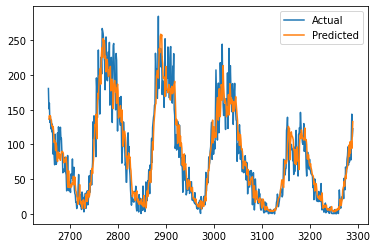

In [11]:
plt.plot(test_data.index[n_steps:], test_data['Sunspot'][n_steps:], label='Actual')
plt.plot(test_data.index[n_steps+1:], test_pred[:,0], label='Predicted')
plt.legend()
plt.show

In [61]:
def upload(data,now):
    shape=data.shape
    data=data.ravel()
    data=np.delete(data,0,axis=None)
    data=np.append(data,now,axis=None)
    data=np.reshape(data,shape)
    return data

In [97]:
ans=[]
go_X=test_X.copy()
go_X=np.delete(go_X, np.s_[1:],axis=0)
print(go_X)
for i in range(0,500):
    print(i)
    ans.append(model.predict(go_X)[0][0])
    go_X=upload(go_X,ans[-1])

[[180.  156.2 136.2 154.8 166.  152.5 121.7 155.5 147.8 170.5 192.3 151.1
  169.9 150.1 137.1 138.8 129.3 135.4 132.4 138.6 157.9 180.8 145.7 155.1]]
0
1/1 [==============================] - 0s 74ms/step
1
1/1 [==============================] - 0s 78ms/step
2
1/1 [==============================] - 0s 48ms/step
3
1/1 [==============================] - 0s 88ms/step
4
1/1 [==============================] - 0s 86ms/step
5
1/1 [==============================] - 0s 67ms/step
6
1/1 [==============================] - 0s 59ms/step
7
1/1 [==============================] - 0s 108ms/step
8
1/1 [==============================] - 0s 173ms/step
9
1/1 [==============================] - 0s 51ms/step
10
1/1 [==============================] - 0s 64ms/step
11
1/1 [==============================] - 0s 110ms/step
12
1/1 [==============================] - 0s 151ms/step
13
1/1 [==============================] - 0s 69ms/step
14
1/1 [==============================] - 0s 63ms/step
15
1/1 [=======================

<function matplotlib.pyplot.show(close=None, block=None)>

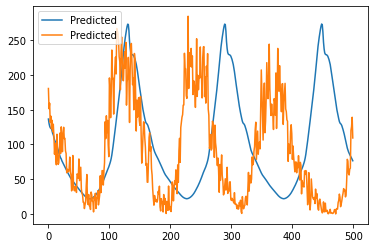

In [100]:
# print(ans)
plt.plot(range(0,500), ans, label='Predicted')
plt.plot(range(0,500), test_y[0:500], label='Predicted')
plt.legend()
plt.show